In [1]:
from requests.compat import urlparse, urlunparse, urljoin
from bs4 import BeautifulSoup
import re
import requests
from requests import Session, request, get
import urllib.request
from urllib.request import urlopen
from urllib.error import URLError, HTTPError
import os
import pandas as pd
import numpy as np
from functools import reduce 
import sqlite3
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from varname import nameof
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorboard.plugins import projector
import itertools, operator
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
annotation = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\annotation.csv", dtype=object)
annotation

,Unnamed: 0,filename,width,height,class,xmin,ymin,xmax,ymax,goods_id
0,0,2273676_0_gallery_61d2d1b168ce1_jpg.rf.0001c81...,230,114,18002,0,0,230,114,2273676
1,1,2289307_0_gallery_61f9650081d74_jpg.rf.0003abe...,534,493,1005,0,0,534,493,2289307
2,2,1774463_0_gallery_60b7933dbe3dc_jpg.rf.00084ca...,217,236,1005,0,0,217,236,1774463
3,3,971502_0_gallery_5e576a533cd0c_jpg.rf.00095109...,138,243,3002,0,0,138,243,971502
4,4,2440926_0_gallery_62754ff787686_jpg.rf.003a871...,242,321,3009,0,0,242,321,2440926
...,...,...,...,...,...,...,...,...,...,...
5368,5368,1798248_0_gallery_61060bd09687a_jpg.rf.5f4f50e...,177,69,18002,0,0,177,69,1798248
5369,5369,904471_0_gallery_63231b4cd6c85_jpg.rf.60251bd3...,223,248,1005,0,0,223,248,904471
5370,5370,1212004_0_gallery_61670aa171318_jpg.rf.6005a42...,128,95,5011,0,0,128,95,1212004
5371,5371,2086653_0_gallery_62345888dc0dc_jpg.rf.605d583...,316,355,1001,0,0,316,355,2086653


In [26]:
mid_class_list = []
for i, row in annotation.iterrows():
    if len(row['class']) < 7:
        mid_class_elm = '0'* (6 - len(row['class'])) + row['class']
    mid_class_list.append(mid_class_elm)
    

In [27]:
annotation["mid_category"] = mid_class_list

In [32]:
grouped = annotation.groupby("mid_category")


In [33]:
grouped

In [39]:
annotation.loc[:, ['filename','width','height','xmin','ymin','xmax','ymax','goods_id','mid_category']].sort_values("mid_category").reset_index().to_csv(
r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_.csv", index=False)

In [3]:
df_ = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_.csv", dtype=object)

In [41]:
df_

,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category
0,2686,746280_0_gallery_5d123b20e541c_jpg.rf.606ee992...,381,397,0,0,381,397,746280,001001
1,870,751030_0_gallery_5cbbf5b9b5723_jpg.rf.a8c10a60...,134,124,0,0,134,124,751030,001001
2,875,746276_0_gallery_60d4874b8d9b5_jpg.rf.a8b90cf1...,269,229,0,1,269,229,746276,001001
3,880,1417691_0_gallery_607d8c04b7da4_jpg.rf.a8f3230...,190,180,0,0,190,180,1417691,001001
4,887,1815503_0_gallery_607e46ae87c6c_jpg.rf.a9d7aff...,222,278,0,0,222,278,1815503,001001
...,...,...,...,...,...,...,...,...,...,...
5368,3992,2468797_0_gallery_637f314a2c451_jpg.rf.dc67f7a...,246,109,0,0,246,109,2468797,018002
5369,802,165990_0_gallery_6093b33720248_jpg.rf.a52ec555...,197,98,0,0,197,98,165990,018002
5370,4005,1794627_0_gallery_61deb5c6efef1_jpg.rf.de22920...,208,257,0,0,208,257,1794627,018002
5371,824,594198_0_gallery_61af3c66bdb1a_jpg.rf.a68b3fc5...,105,65,0,0,105,65,594198,018002


In [46]:
df_["width"] = pd.to_numeric(df_["width"])
df_["height"] = pd.to_numeric(df_["height"])
df_["xmin"] = pd.to_numeric(df_["xmin"])
df_["ymin"] = pd.to_numeric(df_["ymin"])
df_["xmax"] = pd.to_numeric(df_["xmax"])
df_["ymax"] = pd.to_numeric(df_["ymax"])

<AxesSubplot:xlabel='width', ylabel='height'>

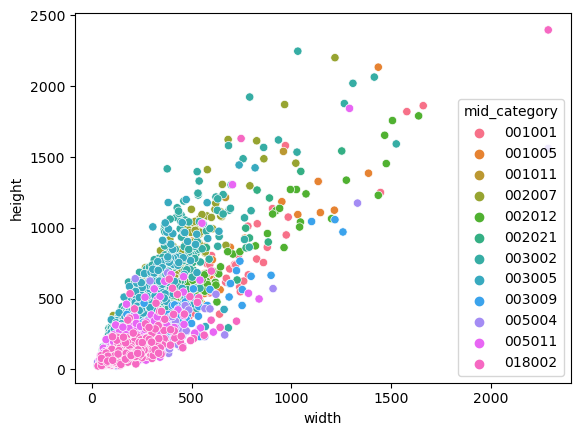

In [47]:
sns.scatterplot(data=df_, x="width", y="height", hue="mid_category")

In [50]:
df_.groupby("mid_category").get_group("001001").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_001001.csv", index=False)
df_.groupby("mid_category").get_group("001005").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_001005.csv", index=False)
df_.groupby("mid_category").get_group("001011").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_001011.csv", index=False)
df_.groupby("mid_category").get_group("002007").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_002007.csv", index=False)
df_.groupby("mid_category").get_group("002021").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_002021.csv", index=False)
df_.groupby("mid_category").get_group("003002").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_003002.csv", index=False)
df_.groupby("mid_category").get_group("003005").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_003005.csv", index=False)
df_.groupby("mid_category").get_group("003009").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_003009.csv", index=False)
df_.groupby("mid_category").get_group("005011").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_005011.csv", index=False)
df_.groupby("mid_category").get_group("018002").to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_018002.csv", index=False)

In [5]:
styleReview_total = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\styleReview_merge.csv", dtype=object)

In [6]:
styleReview_total

,goodsId,reviewIdStyle,reviewDateStyle,reviewImageUrlStyle,major_category,mid_category,goods_id,goods_image
0,1472006,11255152,2020.08.21,https://image.msscdn.net/data/estimate/1472006...,020,020008,1472006,https://image.msscdn.net/images/goods_img/2020...
1,1472006,12031941,2020.10.05,https://image.msscdn.net/data/estimate/1472006...,020,020008,1472006,https://image.msscdn.net/images/goods_img/2020...
2,1472006,12031941,2020.10.05,https://image.msscdn.net/data/estimate/1472006...,020,020008,1472006,https://image.msscdn.net/images/goods_img/2020...
3,1472006,11162705,2020.08.14,https://image.msscdn.net/data/estimate/1472006...,020,020008,1472006,https://image.msscdn.net/images/goods_img/2020...
4,1472006,12357612,2020.10.18,https://image.msscdn.net/data/estimate/1472006...,020,020008,1472006,https://image.msscdn.net/images/goods_img/2020...
...,...,...,...,...,...,...,...,...
252323,2540157,29812886,2022.06.27,https://image.msscdn.net/data/estimate/2540157...,002,002021,2540157,https://image.msscdn.net/images/goods_img/2022...
252324,2540157,29812886,2022.06.27,https://image.msscdn.net/data/estimate/2540157...,002,002021,2540157,https://image.msscdn.net/images/goods_img/2022...
252325,2537851,31082131,2022.08.05,https://image.msscdn.net/data/estimate/2537851...,002,002021,2537851,https://image.msscdn.net/images/goods_img/2022...
252326,2537840,31585769,2022.08.23,https://image.msscdn.net/data/estimate/2537840...,002,002021,2537840,https://image.msscdn.net/images/goods_img/2022...


In [4]:
df_styleReview_001001 = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_001001.csv", dtype=object)

In [56]:
df_styleReview_001001

,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category
0,2686,746280_0_gallery_5d123b20e541c_jpg.rf.606ee992...,381,397,0,0,381,397,746280,001001
1,870,751030_0_gallery_5cbbf5b9b5723_jpg.rf.a8c10a60...,134,124,0,0,134,124,751030,001001
2,875,746276_0_gallery_60d4874b8d9b5_jpg.rf.a8b90cf1...,269,229,0,1,269,229,746276,001001
3,880,1417691_0_gallery_607d8c04b7da4_jpg.rf.a8f3230...,190,180,0,0,190,180,1417691,001001
4,887,1815503_0_gallery_607e46ae87c6c_jpg.rf.a9d7aff...,222,278,0,0,222,278,1815503,001001
...,...,...,...,...,...,...,...,...,...,...
369,21,1841764_0_gallery_625ad3df2bdb4_jpg.rf.011bb3f...,207,339,0,0,207,339,1841764,001001
370,5253,1815503_0_gallery_61dfdfd886f93_jpg.rf.5b66408...,326,419,0,0,326,419,1815503,001001
371,5259,1420730_0_gallery_60b8294d8d638_jpg.rf.5bad324...,122,111,0,0,122,111,1420730,001001
372,5337,1027583_0_gallery_5e9d43630dc8e_jpg.rf.5ecef6a...,357,335,0,0,357,335,1027583,001001


In [7]:
df_right = styleReview_total[["goods_id","goods_image"]].drop_duplicates()

In [8]:
df_styleReview_merge = pd.merge(df_, df_right, how='left', left_on='goods_id', right_on='goods_id')
df_styleReview_merge

,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category,goods_image
0,2686,746280_0_gallery_5d123b20e541c_jpg.rf.606ee992...,381,397,0,0,381,397,746280,001001,https://image.msscdn.net/images/goods_img/2018...
1,870,751030_0_gallery_5cbbf5b9b5723_jpg.rf.a8c10a60...,134,124,0,0,134,124,751030,001001,https://image.msscdn.net/images/goods_img/2018...
2,875,746276_0_gallery_60d4874b8d9b5_jpg.rf.a8b90cf1...,269,229,0,1,269,229,746276,001001,https://image.msscdn.net/images/goods_img/2018...
3,880,1417691_0_gallery_607d8c04b7da4_jpg.rf.a8f3230...,190,180,0,0,190,180,1417691,001001,https://image.msscdn.net/images/goods_img/2020...
4,887,1815503_0_gallery_607e46ae87c6c_jpg.rf.a9d7aff...,222,278,0,0,222,278,1815503,001001,https://image.msscdn.net/images/goods_img/2021...
...,...,...,...,...,...,...,...,...,...,...,...
5368,3992,2468797_0_gallery_637f314a2c451_jpg.rf.dc67f7a...,246,109,0,0,246,109,2468797,018002,https://image.msscdn.net/images/goods_img/2022...
5369,802,165990_0_gallery_6093b33720248_jpg.rf.a52ec555...,197,98,0,0,197,98,165990,018002,https://image.msscdn.net/images/goods_img/2015...
5370,4005,1794627_0_gallery_61deb5c6efef1_jpg.rf.de22920...,208,257,0,0,208,257,1794627,018002,https://image.msscdn.net/images/goods_img/2021...
5371,824,594198_0_gallery_61af3c66bdb1a_jpg.rf.a68b3fc5...,105,65,0,0,105,65,594198,018002,https://image.msscdn.net/images/goods_img/2017...


In [9]:
def download_image(dataframe):
    sample_list = dataframe.goods_image.to_list()
    
    for i in sample_list:
        try:
            image_res = requests.get(i)
            with open(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\12sw_project.v4i.tensorflow\sampleImg\{}_{}_{}.{}".format(
                   i.split('/')[-3],i.split('/')[-2],i.split('/')[-1][:-4],i[-3:]),"wb") as f: 
                f.write(image_res.content)
        except:
            print(i)
            pass

In [10]:
download_image(df_styleReview_merge)

In [18]:
def substitute(url):
    base_dir = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\12sw_project.v4i.tensorflow\sampleImg"
    for i in os.listdir(base_dir):
        if i ==  '_'.join([url.split('/')[-3],url.split('/')[-2],url.split('/')[-1][:-4]])+'.'+url[-3:]:
            try:
                if tf.io.read_file(os.path.join(base_dir ,i)):
                    return os.path.join(base_dir,i)
            except:
                return "0"
    return "0"

In [17]:
url = "https://image.msscdn.net/images/goods_img/20180330/746280/746280_6_500.jpg"
print('_'.join([url.split('/')[-3],url.split('/')[-2],url.split('/')[-1][:-4]])+'.'+url[-3:])

20180330_746280_746280_6_500jpg


In [19]:
sub_sample = list()
for j in df_styleReview_merge["goods_image"]:
    k = substitute(j)
    sub_sample.append(k)

try:
    print(sub_sample.index("0"))
    pass
except:
    print("결측 없음")
    pass
    

결측 없음


In [20]:
sub_sample[1]

'C:\\Users\\panda\\2022 SWA 아카데미\\3차 프로젝트\\cropped\\12sw_project.v4i.tensorflow\\sampleImg\\20180406_751030_751030_5_500.jpg'

In [23]:
sample_path_local = sub_sample
# sample_path_drive = []

review_path_local = []
# review_path_drive = []

for i, row in df_styleReview_merge.iterrows():
    base_dir = r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\12sw_project.v4i.tensorflow\train"
    review_path_local_elm = os.path.join(base_dir, row["filename"])
    review_path_local.append(review_path_local_elm)

df_styleReview_merge["sample_path_local"] = sample_path_local
# df_styleReview_merge["sample_path_drive"] = []
df_styleReview_merge["review_path_local"] = review_path_local
# df_styleReview_merge["reivew_path_drive"] = []

In [26]:
df_styleReview_merge.to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_merge.csv", index=False)

In [28]:
df_styleReview_merge.sample_path_local[0]

'C:\\Users\\panda\\2022 SWA 아카데미\\3차 프로젝트\\cropped\\12sw_project.v4i.tensorflow\\sampleImg\\20180330_746280_746280_6_500.jpg'

In [ ]:
파일 패스 드라이브에 업로드. 
로컬
anchor, poisitve, negative
이미지 디코드, anchor_tensor positive_tensor
코랩 -> negative 생성, negative tensor

In [30]:
df_styleReview_merge = pd.read_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_merge.csv", dtype=object)

In [31]:
df_styleReview_merge 

,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category,goods_image,sample_path_local,review_path_local
0,2686,746280_0_gallery_5d123b20e541c_jpg.rf.606ee992...,381,397,0,0,381,397,746280,001001,https://image.msscdn.net/images/goods_img/2018...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
1,870,751030_0_gallery_5cbbf5b9b5723_jpg.rf.a8c10a60...,134,124,0,0,134,124,751030,001001,https://image.msscdn.net/images/goods_img/2018...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
2,875,746276_0_gallery_60d4874b8d9b5_jpg.rf.a8b90cf1...,269,229,0,1,269,229,746276,001001,https://image.msscdn.net/images/goods_img/2018...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
3,880,1417691_0_gallery_607d8c04b7da4_jpg.rf.a8f3230...,190,180,0,0,190,180,1417691,001001,https://image.msscdn.net/images/goods_img/2020...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
4,887,1815503_0_gallery_607e46ae87c6c_jpg.rf.a9d7aff...,222,278,0,0,222,278,1815503,001001,https://image.msscdn.net/images/goods_img/2021...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,3992,2468797_0_gallery_637f314a2c451_jpg.rf.dc67f7a...,246,109,0,0,246,109,2468797,018002,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5369,802,165990_0_gallery_6093b33720248_jpg.rf.a52ec555...,197,98,0,0,197,98,165990,018002,https://image.msscdn.net/images/goods_img/2015...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5370,4005,1794627_0_gallery_61deb5c6efef1_jpg.rf.de22920...,208,257,0,0,208,257,1794627,018002,https://image.msscdn.net/images/goods_img/2021...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5371,824,594198_0_gallery_61af3c66bdb1a_jpg.rf.a68b3fc5...,105,65,0,0,105,65,594198,018002,https://image.msscdn.net/images/goods_img/2017...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...


In [33]:
pure_goodsid_list = []
for i in os.listdir(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\sampleImg_pure"):
    pure_goodsid_list.append(i.split('_')[1]) 

In [35]:
len(pure_goodsid_list)

3059

In [36]:
df_pure_goodsid = pd.DataFrame({'goods_id_pure': pure_goodsid_list})

In [37]:
df_pure_goodsid

,goods_id_pure
0,25868
1,70063
2,70336
3,76867
4,87864
...,...
3054,2922678
3055,2930893
3056,2946308
3057,2946977


In [40]:
df_styleReview_merge_pure = pd.merge(df_pure_goodsid, df_styleReview_merge, how='left', left_on="goods_id_pure", right_on="goods_id")
df_styleReview_merge_pure

,goods_id_pure,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category,goods_image,sample_path_local,review_path_local
0,25868,2776,25868_0_gallery_5bc7100bc4ff6_jpg.rf.6447220e7...,298,717,0,0,298,717,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
1,25868,1168,25868_0_gallery_5bcc87a2b5ce9_jpg.rf.b6559a493...,368,809,0,0,368,809,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
2,25868,1281,25868_0_gallery_5e57d8c343ff9_jpg.rf.bc6e3cebc...,133,373,0,0,133,373,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
3,25868,3062,25868_0_gallery_5bff80bbdad6a_jpg.rf.7201fb298...,370,583,0,0,370,583,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
4,25868,1149,25868_0_gallery_5f51a6f94de0f_jpg.rf.b63152a86...,68,166,0,0,68,166,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,2930893,563,2930893_0_gallery_6390a095e1d56_jpg.rf.1a1691c...,181,158,0,0,181,158,2930893,018002,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5085,2946308,984,2946308_0_gallery_63870cdf9a6ca_jpg.rf.aed7fd1...,1252,1543,0,0,1252,1543,2946308,002021,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5086,2946977,2536,2946977_0_gallery_638c3022598b8_jpg.rf.9983a27...,68,63,0,0,68,63,2946977,005011,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5087,2946977,629,2946977_0_gallery_638f4eaec5812_jpg.rf.1da588c...,131,87,0,0,131,87,2946977,005011,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...


In [79]:
df_styleReview_merge_pure.to_csv(r"C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\df_styleReview_merge_pure.csv",index=False)

In [80]:
df_styleReview_merge_pure

,goods_id_pure,index,filename,width,height,xmin,ymin,xmax,ymax,goods_id,mid_category,goods_image,sample_path_local,review_path_local
0,25868,2776,25868_0_gallery_5bc7100bc4ff6_jpg.rf.6447220e7...,298,717,0,0,298,717,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
1,25868,1168,25868_0_gallery_5bcc87a2b5ce9_jpg.rf.b6559a493...,368,809,0,0,368,809,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
2,25868,1281,25868_0_gallery_5e57d8c343ff9_jpg.rf.bc6e3cebc...,133,373,0,0,133,373,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
3,25868,3062,25868_0_gallery_5bff80bbdad6a_jpg.rf.7201fb298...,370,583,0,0,370,583,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
4,25868,1149,25868_0_gallery_5f51a6f94de0f_jpg.rf.b63152a86...,68,166,0,0,68,166,25868,003002,https://image.msscdn.net/images/goods_img/2012...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5084,2930893,563,2930893_0_gallery_6390a095e1d56_jpg.rf.1a1691c...,181,158,0,0,181,158,2930893,018002,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5085,2946308,984,2946308_0_gallery_63870cdf9a6ca_jpg.rf.aed7fd1...,1252,1543,0,0,1252,1543,2946308,002021,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5086,2946977,2536,2946977_0_gallery_638c3022598b8_jpg.rf.9983a27...,68,63,0,0,68,63,2946977,005011,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
5087,2946977,629,2946977_0_gallery_638f4eaec5812_jpg.rf.1da588c...,131,87,0,0,131,87,2946977,005011,https://image.msscdn.net/images/goods_img/2022...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...,C:\Users\panda\2022 SWA 아카데미\3차 프로젝트\cropped\1...
